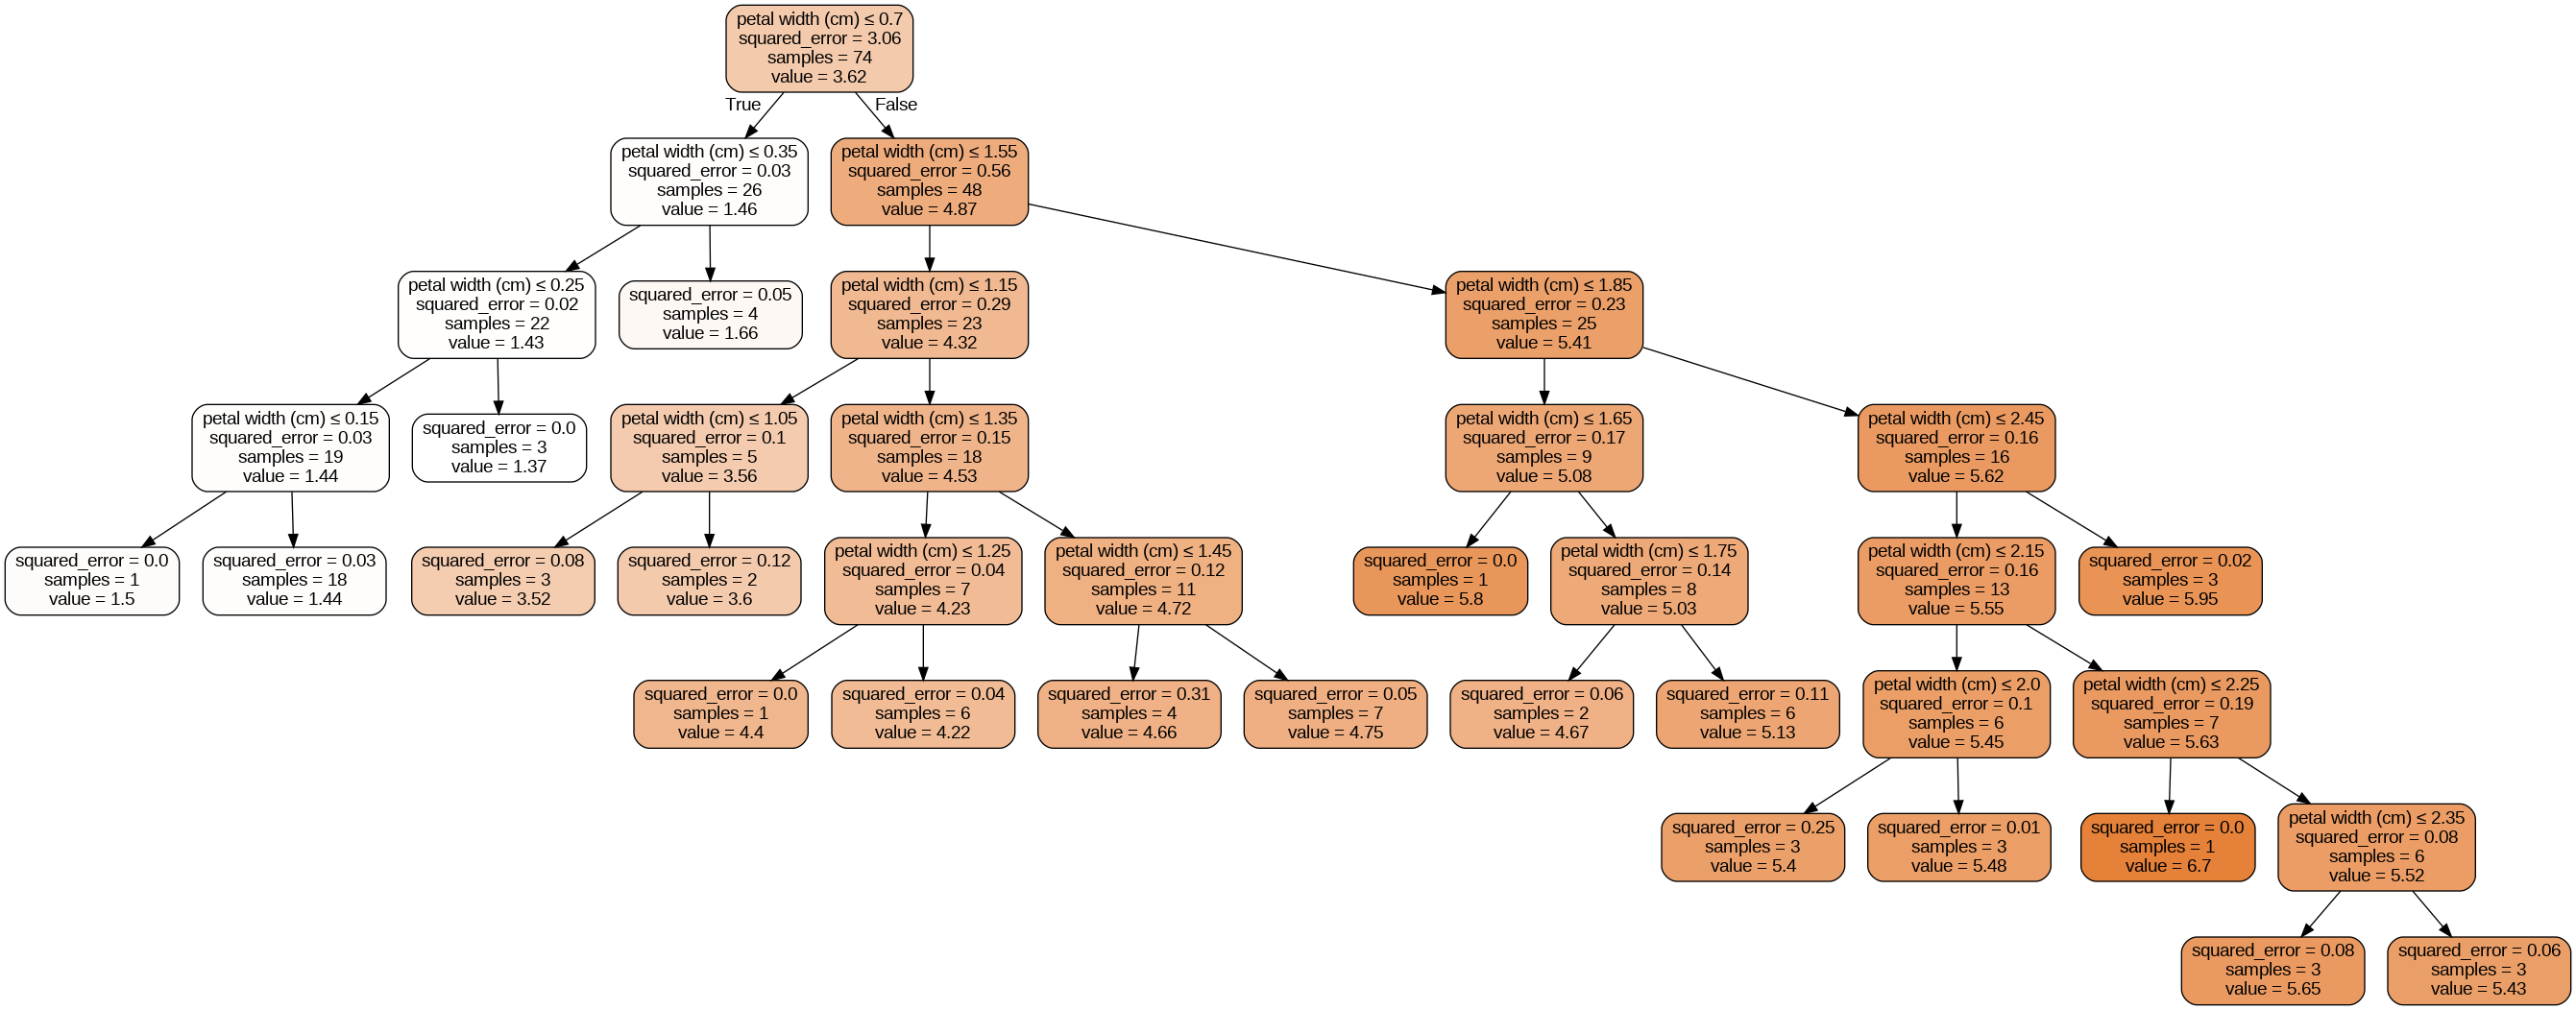

In [5]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image, display

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Use 'petal width (cm)' to predict 'petal length (cm)'
X = data[['petal width (cm)']]  # Feature
y = data['petal length (cm)']   # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Select one tree from the random forest
tree_id = 0  # Index of the tree to visualize
tree = rf.estimators_[tree_id]

# Export the tree as a DOT file
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=['petal width (cm)'],
    filled=True,
    rounded=True,
    special_characters=True,
    precision=2
)

# Render the DOT data with graphviz and display it in Colab
graph = graphviz.Source(dot_data)
graph.format = 'png'  # Render as PNG
graph.render('random_forest_tree', cleanup=True)  # Save as 'random_forest_tree.png' and cleanup intermediate files

# Display the image
from IPython.display import Image
display(Image(filename='random_forest_tree.png'))